In [1]:
import numpy as np
import pandas as pd
d = pd.read_csv('/content/Mall_Customers.csv')

In [2]:
d.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
d.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
d.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
d.drop(columns=['CustomerID','Gender'],inplace=True)

In [7]:
d.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [23]:
x1 = d.iloc[:,:]
x1

,Age,Annual Income (k$),Spending Score (1-100),output
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,5
197,32,126,74,1
198,32,137,18,5


In [24]:
from sklearn.cluster import KMeans
wcss = []
ls = []
for i in range(1,11):
  ls.append(i)
  data = KMeans(n_clusters=i,init='k-means++',random_state=42)
  data.fit(x1)
  wcss.append(data.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [25]:
wcss

[309356.78,
 213374.2670076727,
 143576.7830222837,
 104583.36122999806,
 75466.89178825557,
 58302.40630860368,
 51118.949931647294,
 44312.46881207722,
 40895.95132060132,
 37588.253104100644]

In [26]:
ls

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

<function matplotlib.pyplot.show(close=None, block=None)>

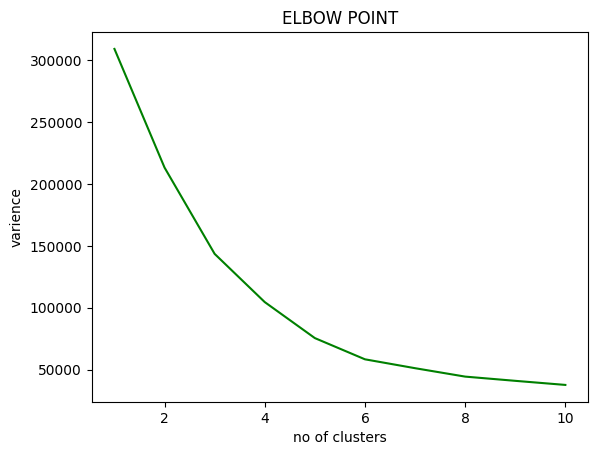

In [27]:
import matplotlib.pyplot as plt
plt.plot(ls,wcss,color='g')
plt.xlabel('no of clusters')
plt.ylabel('varience')
plt.title('ELBOW POINT')
plt.show

In [28]:
model = KMeans(n_clusters=6,init='k-means++',random_state=42)
y_means = model.fit_predict(x1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
y_means

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 4,
       0, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 1, 4, 1, 5, 1, 5, 1, 5, 1,
       4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1], dtype=int32)

In [30]:
d['output'] = y_means

In [31]:
d.head()

,Age,Annual Income (k$),Spending Score (1-100),output
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0


In [32]:
x = d.iloc[:,:-1].values
y = d.iloc[:,-1].values

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [37]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
pr = model.predict(x_test)

In [38]:
pr

array([4, 3, 0, 5, 5, 4, 4, 5, 5, 3, 2, 5, 1, 4, 5, 1, 2, 5, 2, 4, 4, 0,
       5, 4, 4, 2, 4, 2, 1, 4, 3, 0, 2, 4, 5, 2, 1, 1, 5, 2, 2, 1, 0, 0,
       4, 1, 3, 3, 1, 2, 4, 1, 3, 5, 2, 2, 5, 2, 5, 2], dtype=int32)

In [42]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
acc = accuracy_score(y_test,pr)
acc

1.0

In [41]:
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        13

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [43]:
con = confusion_matrix(y_test,pr)
con

array([[ 5,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  0,  0, 13]])

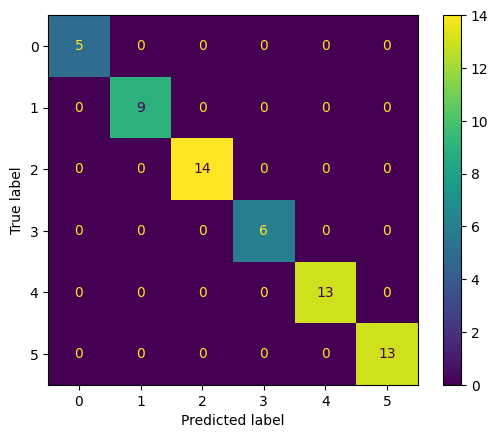

In [44]:
display = ConfusionMatrixDisplay(con)
display.plot()

In [47]:
po = model.predict(sc.transform([[31,17,40]]))
print(po)

[0]
